In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_score, recall_score
)
from scipy.special import expit
import matplotlib.pyplot as plt

In [15]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [17]:
import pandas as pd

df = pd.read_csv("data.csv")


In [18]:
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df = df.dropna()

features = df.drop("diagnosis", axis=1)
labels = df["diagnosis"]


In [19]:
# Train/test split and scaling
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Logistic Regression model training
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_scaled, y_train)

# Predictions and probabilities
y_pred_class = clf.predict(X_test_scaled)
y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]

In [21]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Confusion Matrix:
[[87  3]
 [ 3 50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

ROC AUC Score: 0.9914046121593291


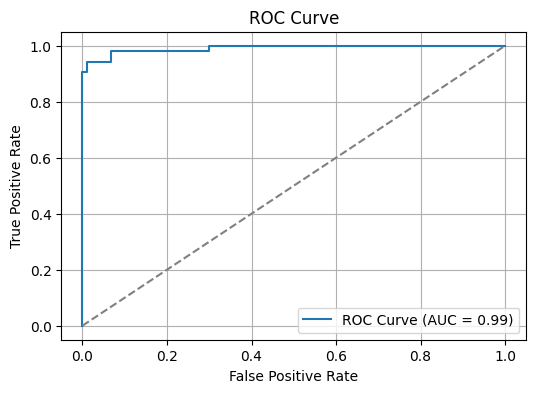

In [22]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

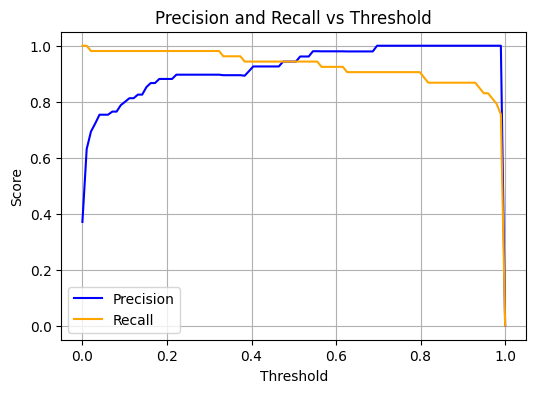

In [23]:
# Threshold Tuning
thresholds = np.linspace(0, 1, 100)
precision_scores = []
recall_scores = []

for threshold in thresholds:
    predicted = (y_pred_prob >= threshold).astype(int)
    precision_scores.append(precision_score(y_test, predicted, zero_division=0))
    recall_scores.append(recall_score(y_test, predicted))

plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision_scores, label="Precision", color='blue')
plt.plot(thresholds, recall_scores, label="Recall", color='orange')
plt.title("Precision and Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

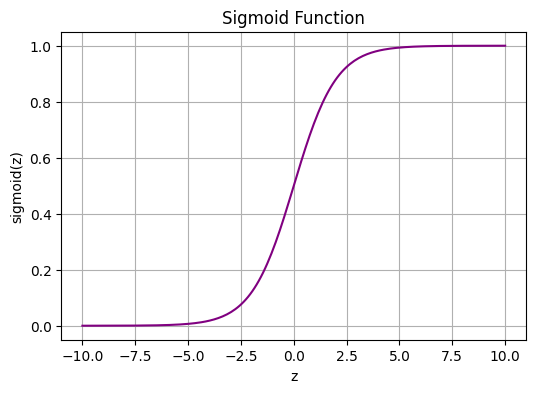

In [24]:
# Sigmoid function visualization
z_values = np.linspace(-10, 10, 200)
sigmoid_values = expit(z_values)

plt.figure(figsize=(6, 4))
plt.plot(z_values, sigmoid_values, color='purple')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid()
plt.show()